# Ridge regression is a regularization technique used in statistical regression analysis to deal with multicollinearity (high correlation between predictor variables) and overfitting. It is an extension of ordinary least squares regression that adds a penalty term to the loss function, which helps to reduce the magnitude of the coefficients.

In ridge regression, the loss function minimizes the sum of squared errors between the predicted values and the actual values, but it also includes a regularization term that penalizes large coefficients. The regularization term is calculated as the sum of squared values of the coefficients multiplied by a hyperparameter called the regularization parameter (λ or alpha). By adjusting the value of λ, we can control the amount of shrinkage applied to the coefficients.

In [1]:
import numpy as np 

In [2]:
from sklearn.metrics import mean_squared_error 

In [3]:
# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - 5 * X[:, 2] + np.random.randn(100)

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
X_train , X_test , y_train,  y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42) 

In [6]:
from  sklearn.preprocessing import StandardScaler 

In [7]:
sc= StandardScaler() 

In [8]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Ridge

In [10]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization parameter (λ)

In [11]:
ridge.fit(X_train_scaled , y_train) 

Ridge()

In [12]:
y_pred = ridge.predict(X_test_scaled) 

In [13]:
from sklearn.metrics import mean_squared_error 

In [14]:
mse = mean_squared_error(y_test , y_pred)

In [15]:
print("Mean Squared Error :" , mse)
print("Ridge Coefficient is :" , ridge.coef_)
print("Ridge Intercept is :" , ridge.intercept_)

Mean Squared Error : 0.980794493089116
Ridge Coefficient is : [ 0.49459928  0.82161918 -1.25992254  0.04516531 -0.13896937]
Ridge Intercept is : 0.23287376962200315


# how i select alpha parameter value for ridge regression ?  

# The choice of alpha determines the trade-off between fitting the training data
# well and keeping the coefficients small to avoid overfitting.

# (1). Grid Search: This method involves evaluating the model's performance for different
#     values of alpha and selecting the one that gives the best results. We can define a range 
#     of alpha values and iterate over them, training and evaluating the model using techniques like cross-validation. 
#     Scikit-learn provides the GridSearchCV class that automates this process.

In [16]:
from sklearn.model_selection import GridSearchCV 

# Define a range of alpha values 
alphas = [0.1 , 1.0 , 10.0] 

# create ridge model 
ridge = Ridge() 

# Perform grid search to find the best alpha
grid = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5)
grid.fit(X_train_scaled, y_train)

# Get the best alpha value 
best_alpha = grid.best_params_['alpha']

In [17]:
# (2) . Cross-Validation: Another approach is to use cross-validation to estimate the performance of the model 
#     for different alpha values. You can evaluate the model using different folds of the training data and 
#     compute the average performance. 
#     Scikit-learn provides the cross_val_score function for this purpose.

In [18]:
from sklearn.model_selection import cross_val_score

# Define a range of alpha values
alphas = [0.1, 1.0, 10.0]

# Create a Ridge regression model
ridge = Ridge()

In [19]:
# Perform cross-validation to estimate performance for each alpha
mse_scores = [] 
for  alpha in alphas :
    ridge.alpha = alpha 
    scores = cross_val_score(ridge , X_train_scaled , y_train , cv = 5  , scoring = 'neg_mean_squared_error') 
    mse_scores.append(np.mean(-scores)) 
    
# Find the best alpha with the lowest MSE score 
best_alpha = alphas[np.argmin(mse_scores)] 

In [20]:
# (3). Regularization Path: The regularization path shows the effect of different alpha values on the coefficients of
#     the ridge regression model. By plotting the coefficients against different alpha values, you can observe how they change. 
#     This visualization can help you understand the effect of regularization and identify a suitable alpha value.

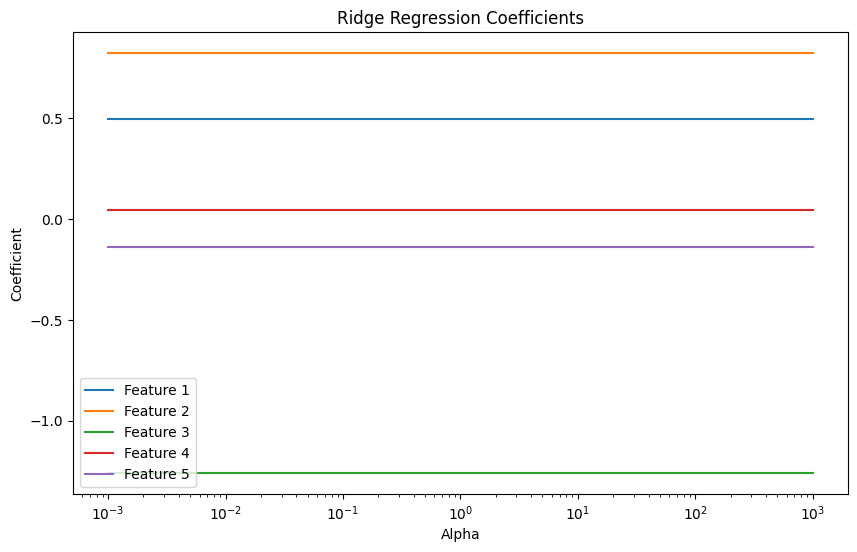

In [21]:
import matplotlib.pyplot as plt 
# Create a Ridge regression model 

ridge = Ridge() 

# Calculate the regularization path 
alphas = np.logspace(-3,3,num=100) 
coefs = [] 
for alpha in alphas :
    ridge.alphas = alpha 
    ridge.fit(X_train_scaled , y_train) 
    coefs.append(ridge.coef_) 
    
# Plot the coefficients against alpha 
plt.figure(figsize=(10, 6))
for i in range(X_train_scaled.shape[1]):
    plt.plot(alphas, np.array(coefs)[:, i], label='Feature {}'.format(i+1))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients')
plt.legend()
plt.show()

# Apply on a data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_diabetes

df=load_diabetes()

# print(df.DESCR)

In [23]:
X = df.data 
y = df.target 

In [24]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42) 

In [25]:
from sklearn.linear_model import LinearRegression 

In [26]:
lr = LinearRegression() 

In [27]:
lr.fit(X_train , y_train) 

LinearRegression()

In [28]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [29]:
lr.intercept_

151.34560453985995

In [30]:
y_pred = lr.predict(X_test) 

In [31]:
from sklearn.metrics import r2_score , mean_squared_error 

In [32]:
print("R2 Score :" , r2_score(y_test , y_pred)) 
print("Mean Squared Error :" , mean_squared_error(y_test , y_pred)) 

R2 Score : 0.4526027629719197
Mean Squared Error : 2900.19362849348


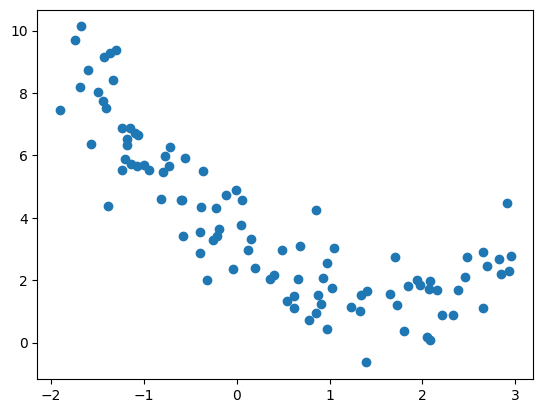

In [33]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)
plt.scatter(x1, x2)
plt.show()

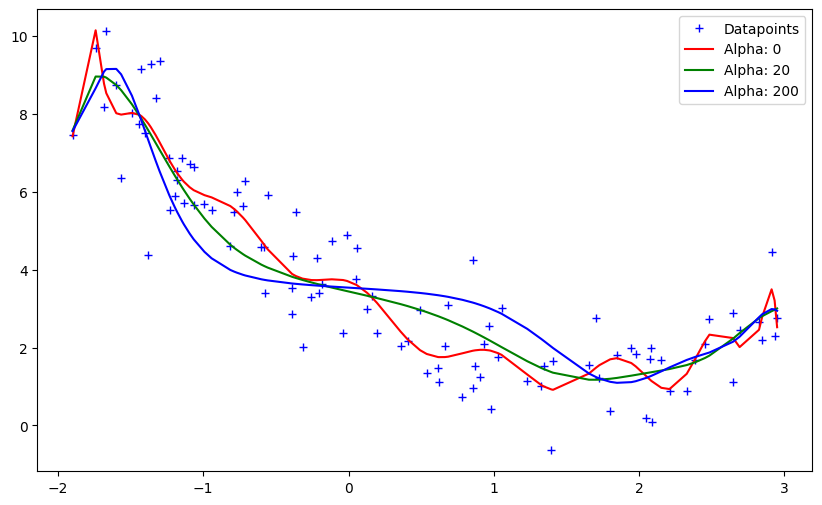

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# Ridge Regression gradient Descent 

In [35]:
from sklearn.datasets import load_diabetes 
import numpy as np 
from sklearn.metrics import r2_score 


In [36]:
X,y = load_diabetes(return_X_y = True) 

In [37]:
from sklearn.model_selection import train_test_split 

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 4) 

In [39]:
from sklearn.linear_model import SGDRegressor 

# penalty='l2': This parameter specifies the regularization term to be used in the regression algorithm. In this case, 'l2' refers to Ridge regularization, which adds the squared sum of the coefficients multiplied by a regularization parameter to the loss function. This penalty helps prevent overfitting by shrinking the coefficients towards zero.
    
    

max_iter=500: This parameter sets the maximum number of iterations for the solver to converge. The solver uses an iterative optimization algorithm to find the optimal coefficients that minimize the loss function. The maximum number of iterations ensures that the solver stops if it does not converge within the specified limit.
    
    

eta0=0.1: This parameter defines the initial learning rate. The learning rate controls the step size taken during each iteration of the optimization algorithm. It determines how much the coefficients are updated based on the gradient of the loss function. In this case, the initial learning rate is set to 0.1.
    
    

learning_rate='constant': This parameter determines the learning rate schedule. 'constant' means that the learning rate remains constant throughout the optimization process. Other options include 'optimal' (adaptive learning rate based on a heuristic) and 'invscaling' (gradually decreasing learning rate).
    
    

alpha=0.001: This parameter represents the regularization strength or the inverse of the regularization parameter. A smaller value of alpha indicates a stronger regularization effect. It helps control the trade-off between fitting the training data well and keeping the model's coefficients small.
    
    

In [40]:
reg = SGDRegressor(penalty = 'l2' , max_iter = 500 , eta0 = 0.1 , learning_rate = 'constant' , alpha = 0.001) 

In [41]:
reg.fit(X_train , y_train) 

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [42]:
y_pred = reg.predict(X_test) 

In [43]:
print("R2-SCORE : " , r2_score(y_test , y_pred)) 
print("Slope:" , reg.coef_)
print("Intercept :" , reg.intercept_)

R2-SCORE :  0.428270176424269
Slope: [  47.82884742 -154.00170477  371.2511325   272.54210522   -8.65754064
  -60.254311   -169.57927526  135.6950756   329.82472116   95.60770471]
Intercept : [142.7814887]


# alpha=0.001: This parameter represents the regularization strength or the inverse of the regularization parameter. A smaller value of alpha indicates a stronger regularization effect. It helps control the trade-off between fitting the training data well and keeping the model's coefficients small. In this case, the regularization strength is set to 0.001.
    

max_iter=500: This parameter sets the maximum number of iterations for the solver to converge. The solver uses an iterative optimization algorithm to find the optimal coefficients that minimize the loss function. The maximum number of iterations ensures that the solver stops if it does not converge within the specified limit.
    

solver='sparse_cg': This parameter determines the solver algorithm to use. 'sparse_cg' refers to the conjugate gradient solver, which is suitable for solving large-scale linear regression problems with sparse data. Other options for the solver parameter include 'auto' (chooses the best solver automatically based on the problem), 'svd' (uses Singular Value Decomposition), and 'cholesky' (uses the closed-form solution based on Cholesky factorization).
    

In [44]:
from sklearn.linear_model import Ridge 


In [45]:
reg = Ridge(alpha = 0.001 , max_iter = 500 , solver = 'sparse_cg') 

In [46]:
reg.fit(X_train , y_train) 

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [47]:
y_pred = reg.predict(X_test) 
# y_pred

In [48]:
print("R2 SCORE :" , r2_score(y_pred , y_test)) 
print("SLOPE:" , reg.coef_)
print("INTERCEPT :" , reg.intercept_)

R2 SCORE : -0.10861338142577748
SLOPE: [  34.521938   -290.84082977  482.40183118  368.06788287 -852.44871249
  501.59162255  180.11114107  270.76336467  759.73536675   37.49137262]
INTERCEPT : 151.10198521810347


# np.insert(arr, obj, values, axis): This is a NumPy function that inserts values into an array along a specified axis. It takes four arguments:

arr: The array in which values are to be inserted. In this case, it is X_train.
obj: The index or indices before which the values should be inserted. In this case, 0 is specified, which means the values will be inserted at the beginning of the array.
values: The values to be inserted. In this case, 1 is specified, indicating a column of ones.
axis: The axis along which the insertion should be performed. 1 is specified, indicating that the values should be inserted along the columns.

In [49]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [50]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [51]:
reg.fit(X_train , y_train) 

In [52]:
y_pred = reg.predict(X_test) 

In [53]:
print('r2 socre:' , r2_score(y_test , y_pred)) 

r2 socre: 0.4738018280260914


In [54]:
print(reg.coef_)

[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]


In [55]:
print(reg.intercept_)

150.8697531671347
